# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/Amin-Golden/yolov5 # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

In [ ]:
!python detect.py --weights YOLOv5m6-Argoverse.pt --source ../../input/kitti-odometry/sequences/09/image_2/ --img 1280

!python detect.py --weights YOLOv5m6-Argoverse.pt --source ../../input/kitti-odometry/sequences/10/image_2/ --img 1280

# display.Image(filename='runs/detect/exp/000000.png', width=600)

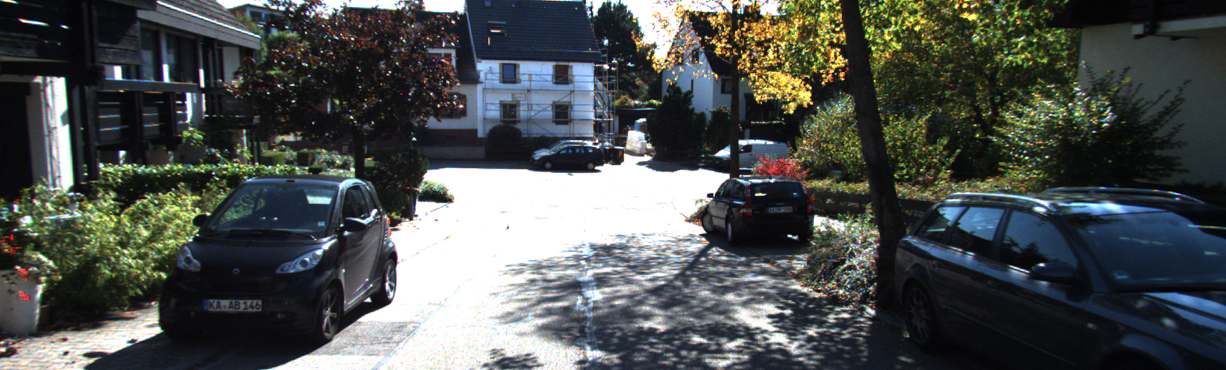

In [87]:
display.Image(filename='kitti_odom_test/sequences/09/image_2/000900.png', width=640)

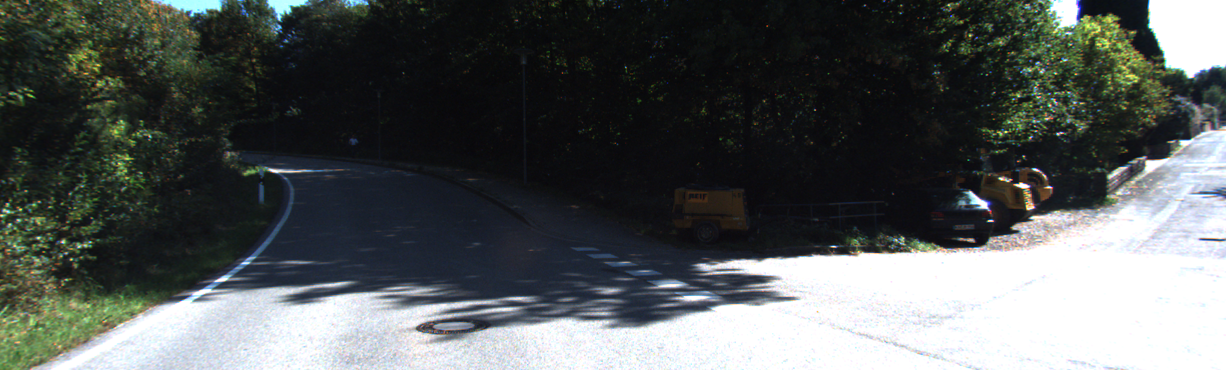

In [108]:
import PIL 
PIL.Image.open("000000.png")
PIL.Image.open("000000.png")

In [115]:
PIL.Image.open("kitti-odometry-woo/sequences/09/image_2/000000.png").size

(1226, 370)

In [121]:
import shutil
shutil.make_archive("vo_results", 'zip', "vo_results")
# from IPython.display import FileLink  
# FileLink(r'/kaggle/working/yolov5/exp32.zip')

'/kaggle/working/SC-SfMLearner/vo_results.zip'

In [104]:
from IPython.display import FileLink  
FileLink(r"000000.png")

/kaggle/working/SC-SfMLearner/kitti_odom_test/sequences/09/image_2/000000.png

 <a href="./SC-SfMLearner/vo_results.zip"> Download File </a>

import PIL 

In [ ]:
!rm "exp.zip"
!rm -r "kitti-odometry-woo"

In [36]:
!git clone https://github.com/Amin-Golden/SC-SfMLearner

fatal: destination path 'SC-SfMLearner' already exists and is not an empty directory.


In [27]:
!pip3 install -r requirements.txt

In [56]:
POSE_NET="models/exp_pose_model_best.pth.tar"
KITIT_VO="../yolov5/kitti-odometry-woo/"#"../../input/kitti-odometry/" 
#"../yolov5/kitti-odometry-woo/"

!python test_pose.py $POSE_NET \
--img-height 375 --img-width 1242 \
--dataset-dir $KITIT_VO \
--sequences 09

!python test_pose.py $POSE_NET \
--img-height 375 --img-width 1242 \
--dataset-dir $KITIT_VO \
--sequences 10

getting test metadata for theses sequences : {Path('../yolov5/kitti-odometry-woo/sequences/09')}
  0%|                                                     | 0/1 [00:00<?, ?it/s]
Traceback (most recent call last):
  File "test_pose.py", line 126, in <module>
    main()
  File "/opt/conda/lib/python3.7/site-packages/torch/autograd/grad_mode.py", line 28, in decorate_context
    return func(*args, **kwargs)
  File "test_pose.py", line 41, in main
    framework = test_framework(dataset_dir, args.sequences, seq_length)
  File "/kaggle/working/SC-SfMLearner/kitti_eval/pose_evaluation_utils.py", line 12, in __init__
    self.img_files, self.poses, self.sample_indices = read_scene_data(self.root, sequence_set, seq_length, step)
  File "/kaggle/working/SC-SfMLearner/kitti_eval/pose_evaluation_utils.py", line 51, in read_scene_data
    poses = np.genfromtxt(data_root/'poses'/'{}.txt'.format(sequence.name)).astype(np.float64).reshape(-1, 3, 4)
  File "/opt/conda/lib/python3.7/site-packages/numpy/

In [120]:
DATASET_DIR= "../yolov5/kitti-odometry-woo/sequences/"#"../../input/kitti-odometry/sequences/"kitti_odom_test/sequences/"#
OUTPUT_DIR="vo_results/"

POSE_NET="models/exp_pose_model_best.pth.tar"


!python test_vo.py \
--img-height 256 --img-width 832 \
--sequence 09 \
--pretrained-posenet $POSE_NET --dataset-dir $DATASET_DIR --output-dir $OUTPUT_DIR

!python test_vo.py \
--img-height 256 --img-width 832 \
--sequence 10 \
--pretrained-posenet $POSE_NET --dataset-dir $DATASET_DIR --output-dir $OUTPUT_DIR

!python ./kitti_eval/eval_odom.py --result=$OUTPUT_DIR --align='7dof'


1591 files to test
100%|███████████████████████████████████████| 1590/1590 [01:53<00:00, 13.96it/s]
1201 files to test
100%|███████████████████████████████████████| 1200/1200 [01:02<00:00, 19.20it/s]
Sequence: 9
Translational error (%):  7.920223599393024
Rotational error (deg/100m):  3.856162868550692
ATE (m):  31.245709752659604
RPE (m):  0.10953294080694562
RPE (deg):  0.1030622936806729
Sequence: 10
Translational error (%):  8.020257242246856
Rotational error (deg/100m):  5.136328766247597
ATE (m):  11.38592894270928
RPE (m):  0.08167191226587633
RPE (deg):  0.10779280992290492
-------------------- For Copying ------------------------------
7.92
3.86
8.02
5.14


In [65]:
!wget https://public.bn.files.1drv.com/y4m0QwQYZPFgfkkRm6bt49mXDfdZxfvda4zhRQw5iZ0ppXuqqzFImL5CKmYcm4wE6LAQ1U29qQZpeu7HOI7Irkza4lyI2P4HC-St8EFGPY7-rZ0tL6bxyDI7aOx1Mfy2VYdFnAS0xWm5Q6CK5usW0vAaLsaObK165f_9pob0mdSm5JJYcSx7W4JgfRg4WMqxTTDIaq8qr2OrKn3qv1CFWfN5CE83ktDToF8oL30sJ0D81U?access_token=EwAAA61DBAAU2kADSankulnKv2PwDjfenppNXFIAAfrKxtXa9JUdy1xTfVl01S70IcDF7OVNzB6ZEqDuj%2b/AeS5PkZ73Wf0HzVphoZ92fqF8aCxhGCIn/1SfMGrnHNk7Hoje4hsqGa5akyZGnP3CtcO0T70EfAnm28fH9q52RrUCueWssDtrvXKILOD1Ox/BjzgjptN90jGzvfTY4ycUeQpTV6OvGg%2bh3vhnvELFBJKgLmn6zB4O1UfljgYJ2StGlZtW99a3ad1dNT/iyoXPwx0yJxGTzliV/YCp%2beeC4qiPRFGkVy1zNAH%2bgj/kj4q7qN/YfMqBsIYaLHwsSgu7av1L6tbXeev4cfZXPKaQ0I/Gw40l%2bNQmFYPCwHmls68DZgAACJwPrBGEIkEZ0AGFKd3qiD060DIe5qeFW5PBybfvd9Y8ohL4WH0PG3TJMvO/YyIAJM2Oc39jMVTNfZ19lnHvwXoZ2s40tt63mtNHHcdgxOIeql1FiJvHydlMT0w%2btWo2fXam2CFQKXgBRt66rwsZEj5kYQL5BXItbYnfQ8s/%2bLNJUvb3hjaBjFNhPtuwpFy2g3qjPLxehmxl6OBkxaZWEaOin6kWW87qo7xCWY%2b48BfrLdYDU8u%2bHxdNfH6UgjJqigrv6SSCyea7iasqEXG17cG4QtwBGVqz6te5jCzPLNvb3K5Mkk5RLS%2bpeNXBcrZNBMgCl1BPo7UbXA%2btBlulIrbZ3DGy6F9jaRaZoYXxJL4aay6N6cxJ6ibom1%2bhY%2bIAduSn5n58qN/mpggY0Py3TCWclzaJo2u37kiNh4ZW7p7/A7ynUSIp88d8OvZaKDpceFZuyfyV0sre3xF6mpunjQ085xZsgMVmf0aiiBDxFgo0Xbd/bjfqXwCpEdZpVksavVC%2bsKH0KRXd0LebY22tGBa2DqO0yer7ZPbBtRMf3k0c6thbsuHslw7b/oN76XJDbkeBfkYB0bdxLYEDZtssM/46KKF4FyhnUrg0Fzco1tUB0JnuF1biJfLhWQwC


The name is too long, 1306 chars total.
Trying to shorten...
New name is y4m0QwQYZPFgfkkRm6bt49mXDfdZxfvda4zhRQw5iZ0ppXuqqzFImL5CKmYcm4wE6LAQ1U29qQZpeu7HOI7Irkza4lyI2P4HC-St8EFGPY7-rZ0tL6bxyDI7aOx1Mfy2VYdFnAS0xWm5Q6CK5usW0vAaLsaObK165f_9pob0mdSm5JJYcSx7W4JgfRg4WMqxTTDIaq8qr2OrKn3qv1CFWfN5CE83ktDToF8oL30sJ0D8.
--2022-01-02 21:21:35--  https://public.bn.files.1drv.com/y4m0QwQYZPFgfkkRm6bt49mXDfdZxfvda4zhRQw5iZ0ppXuqqzFImL5CKmYcm4wE6LAQ1U29qQZpeu7HOI7Irkza4lyI2P4HC-St8EFGPY7-rZ0tL6bxyDI7aOx1Mfy2VYdFnAS0xWm5Q6CK5usW0vAaLsaObK165f_9pob0mdSm5JJYcSx7W4JgfRg4WMqxTTDIaq8qr2OrKn3qv1CFWfN5CE83ktDToF8oL30sJ0D81U?access_token=EwAAA61DBAAU2kADSankulnKv2PwDjfenppNXFIAAfrKxtXa9JUdy1xTfVl01S70IcDF7OVNzB6ZEqDuj%2b/AeS5PkZ73Wf0HzVphoZ92fqF8aCxhGCIn/1SfMGrnHNk7Hoje4hsqGa5akyZGnP3CtcO0T70EfAnm28fH9q52RrUCueWssDtrvXKILOD1Ox/BjzgjptN90jGzvfTY4ycUeQpTV6OvGg%2bh3vhnvELFBJKgLmn6zB4O1UfljgYJ2StGlZtW99a3ad1dNT/iyoXPwx0yJxGTzliV/YCp%2beeC4qiPRFGkVy1zNAH%2bgj/kj4q7qN/YfMqBsIYaLHwsSgu7av1L6tbXeev4cfZXPKaQ0I/Gw40l%2b

# 1. Inference

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/127574988-6a558aa1-d268-44b9-bf6b-62d4c605cc72.jpg" width="600">

# 2. Validate
Validate a model's accuracy on [COCO](https://cocodataset.org/#home) val or test-dev datasets. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be ~1% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

## COCO val
Download [COCO val 2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L14) dataset (1GB - 5000 images), and test model accuracy.

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip

In [ ]:
# Run YOLOv5x on COCO val
!python val.py --weights yolov5x.pt --data coco.yaml --img 640 --iou 0.65 --half

## COCO test
Download [COCO test2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L15) dataset (7GB - 40,000 images), to test model accuracy on test-dev set (**20,000 images, no labels**). Results are saved to a `*.json` file which should be **zipped** and submitted to the evaluation server at https://competitions.codalab.org/competitions/20794.

In [ ]:
# Download COCO test-dev2017
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017labels.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f -d ../datasets/coco/images

In [ ]:
# Run YOLOv5x on COCO test
!python val.py --weights yolov5x.pt --data coco.yaml --img 640 --iou 0.65 --half --task test

# 3. Train

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="1000" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s model on the [COCO128](https://www.kaggle.com/ultralytics/coco128) dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.
<br><br>

## Train on Custom Data with Roboflow 🌟 NEW

[Roboflow](https://roboflow.com/?ref=ultralytics) enables you to easily **organize, label, and prepare** a high quality dataset with your own custom data. Roboflow also makes it easy to establish an active learning pipeline, collaborate with your team on dataset improvement, and integrate directly into your model building workflow with the `roboflow` pip package.

- Custom Training Example: [https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/](https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/?ref=ultralytics)
- Custom Training Notebook: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/yolov5-custom-training-tutorial/blob/main/yolov5-custom-training.ipynb)
<br>

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="480" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/6152a275ad4b4ac20cd2e21a_roboflow-annotate.gif"/></a></p>Label images lightning fast (including with model-assisted labeling)

In [ ]:
# Tensorboard  (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

In [ ]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

# 4. Visualize

## Weights & Biases Logging 🌟 NEW

[Weights & Biases](https://wandb.ai/site?utm_campaign=repo_yolo_notebook) (W&B) is now integrated with YOLOv5 for real-time visualization and cloud logging of training runs. This allows for better run comparison and introspection, as well improved visibility and collaboration for teams. To enable W&B `pip install wandb`, and then train normally (you will be guided through setup on first use). 

During training you will see live updates at [https://wandb.ai/home](https://wandb.ai/home?utm_campaign=repo_yolo_notebook), and you can create and share detailed [Reports](https://wandb.ai/glenn-jocher/yolov5_tutorial/reports/YOLOv5-COCO128-Tutorial-Results--VmlldzozMDI5OTY) of your results. For more information see the [YOLOv5 Weights & Biases Tutorial](https://github.com/ultralytics/yolov5/issues/1289). 

<p align="left"><img width="900" alt="Weights & Biases dashboard" src="https://user-images.githubusercontent.com/26833433/135390767-c28b050f-8455-4004-adb0-3b730386e2b2.png"></p>

## Local Logging

All results are logged by default to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc. View train and val jpgs to see mosaics, labels, predictions and augmentation effects. Note an Ultralytics **Mosaic Dataloader** is used for training (shown below), which combines 4 images into 1 mosaic during training.

> <img src="https://user-images.githubusercontent.com/26833433/131255960-b536647f-7c61-4f60-bbc5-cb2544d71b2a.jpg" width="700">  
`train_batch0.jpg` shows train batch 0 mosaics and labels

> <img src="https://user-images.githubusercontent.com/26833433/131256748-603cafc7-55d1-4e58-ab26-83657761aed9.jpg" width="700">  
`test_batch0_labels.jpg` shows val batch 0 labels

> <img src="https://user-images.githubusercontent.com/26833433/131256752-3f25d7a5-7b0f-4bb3-ab78-46343c3800fe.jpg" width="700">  
`test_batch0_pred.jpg` shows val batch 0 _predictions_

Training results are automatically logged to [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) as `results.csv`, which is plotted as `results.png` (below) after training completes. You can also plot any `results.csv` file manually:

```python
from utils.plots import plot_results 
plot_results('path/to/results.csv')  # plot 'results.csv' as 'results.png'
```

<img align="left" width="800" alt="COCO128 Training Results" src="https://user-images.githubusercontent.com/26833433/126906780-8c5e2990-6116-4de6-b78a-367244a33ccf.png">

# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Google Colab and Kaggle** notebooks with free GPU: <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/AWS-Quickstart)
- **Docker Image**. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![CI CPU testing](https://github.com/ultralytics/yolov5/workflows/CI%20CPU%20testing/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on MacOS, Windows, and Ubuntu every 24 hours and on every commit.


# Appendix

Optional extras below. Unit tests validate repo functionality and should be run on any PRs submitted.


In [ ]:
# Reproduce
for x in 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x':
  !python val.py --weights {x}.pt --data coco.yaml --img 640 --task speed  # speed
  !python val.py --weights {x}.pt --data coco.yaml --img 640 --conf 0.001 --iou 0.65  # mAP

In [ ]:
# PyTorch Hub
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Images
dir = 'https://ultralytics.com/images/'
imgs = [dir + f for f in ('zidane.jpg', 'bus.jpg')]  # batch of images

# Inference
results = model(imgs)
results.print()  # or .show(), .save()

In [ ]:
# CI Checks
%%shell
export PYTHONPATH="$PWD"  # to run *.py. files in subdirectories
rm -rf runs  # remove runs/
for m in yolov5n; do  # models
  python train.py --img 64 --batch 32 --weights $m.pt --epochs 1 --device 0  # train pretrained
  python train.py --img 64 --batch 32 --weights '' --cfg $m.yaml --epochs 1 --device 0  # train scratch
  for d in 0 cpu; do  # devices
    python val.py --weights $m.pt --device $d # val official
    python val.py --weights runs/train/exp/weights/best.pt --device $d # val custom
    python detect.py --weights $m.pt --device $d  # detect official
    python detect.py --weights runs/train/exp/weights/best.pt --device $d  # detect custom
  done
  python hubconf.py  # hub
  python models/yolo.py --cfg $m.yaml  # build PyTorch model
  python models/tf.py --weights $m.pt  # build TensorFlow model
  python export.py --img 64 --batch 1 --weights $m.pt --include torchscript onnx  # export
done

In [ ]:
# Profile
from utils.torch_utils import profile

m1 = lambda x: x * torch.sigmoid(x)
m2 = torch.nn.SiLU()
results = profile(input=torch.randn(16, 3, 640, 640), ops=[m1, m2], n=100)

In [ ]:
# Evolve
!python train.py --img 640 --batch 64 --epochs 100 --data coco128.yaml --weights yolov5s.pt --cache --noautoanchor --evolve
!d=runs/train/evolve && cp evolve.* $d && zip -r evolve.zip $d && gsutil mv evolve.zip gs://bucket  # upload results (optional)

In [ ]:
# VOC
for b, m in zip([64, 48, 32, 16], ['yolov5s', 'yolov5m', 'yolov5l', 'yolov5x']):  # zip(batch_size, model)
  !python train.py --batch {b} --weights {m}.pt --data VOC.yaml --epochs 50 --cache --img 512 --nosave --hyp hyp.finetune.yaml --project VOC --name {m}

In [ ]:
# TensorRT 
# https://developer.nvidia.com/nvidia-tensorrt-download
!lsb_release -a  # check system
%ls /usr/local | grep cuda  # check CUDA
!wget https://ultralytics.com/assets/TensorRT-8.2.0.6.Linux.x86_64-gnu.cuda-11.4.cudnn8.2.tar.gz  # download
![ -d /content/TensorRT-8.2.0.6/ ] || tar -C /content/ -zxf ./TensorRT-8.2.0.6.Linux.x86_64-gnu.cuda-11.4.cudnn8.2.tar.gz  # unzip
%pip list | grep tensorrt || pip install /content/TensorRT-8.2.0.6/python/tensorrt-8.2.0.6-cp37-none-linux_x86_64.whl  # install
%env LD_LIBRARY_PATH=/usr/local/cuda-11.1/lib64:/content/cuda-11.1/lib64:/content/TensorRT-8.2.0.6/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64  # add to path

!python export.py --weights yolov5s.pt --include engine --imgsz 640 640 --device 0
!python detect.py --weights yolov5s.engine --imgsz 640 640 --device 0